# Electric Vehicle Population Data Analysis 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [6]:
df= pd.read_csv("Electric_Vehicle_Population_Data.csv")

# Data Description

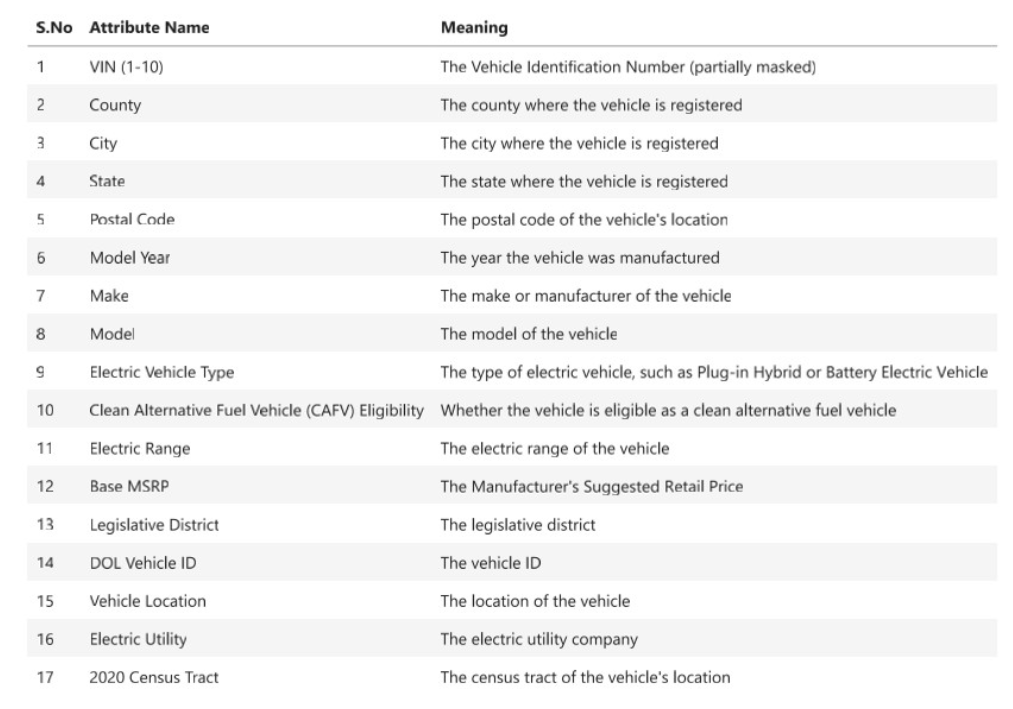

In [7]:
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Counties,Congressional Districts,WAOFM - GIS - Legislative District Boundary
0,5UXTA6C05P,Yakima,Yakima,WA,98903.0,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,14.0,227153587,POINT (-120.477805 46.553505),PACIFICORP,5.307700e+10,2746.0,4.0,22.0
1,5YJRE11B48,NaN,NaN,BC,NaN,2008,TESLA,ROADSTER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,98950,NaN,143609049,NaN,NaN,NaN,NaN,NaN,NaN
2,5YJSA1E24G,King,Seattle,WA,98103.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,43.0,187728201,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10,3009.0,7.0,4.0
3,1N4AZ1CP5J,King,Shoreline,WA,98177.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0,32.0,249867971,POINT (-122.382425 47.77279),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303302e+10,3009.0,7.0,21.0
4,5YJ3E1EA6J,Island,Coupeville,WA,98239.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,10.0,223792649,POINT (-122.6880708 48.2179983),PUGET SOUND ENERGY INC,5.302997e+10,3007.0,2.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153825,1N4AZ0CP0D,San Juan,Eastsound,WA,98245.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,40.0,154379130,POINT (-122.907229 48.7016716),BONNEVILLE POWER ADMINISTRATION||ORCAS POWER &...,5.305596e+10,3211.0,2.0,43.0
153826,5YJSA1E27H,Spokane,Spokane,WA,99223.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,6.0,204991475,POINT (-117.369705 47.62637),BONNEVILLE POWER ADMINISTRATION||INLAND POWER ...,5.306301e+10,3214.0,5.0,9.0
153827,1G1FW6S03P,King,Seatac,WA,98188.0,2023,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,33.0,244720059,POINT (-122.29179 47.43473),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10,3009.0,9.0,36.0
153828,3FMTK3SU1M,King,Kent,WA,98031.0,2021,FORD,MUSTANG MACH-E,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,33.0,186104215,POINT (-122.2012521 47.3931814),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10,3009.0,9.0,46.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153830 entries, 0 to 153829
Data columns (total 20 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         153830 non-null  object 
 1   County                                             153827 non-null  object 
 2   City                                               153827 non-null  object 
 3   State                                              153830 non-null  object 
 4   Postal Code                                        153827 non-null  float64
 5   Model Year                                         153830 non-null  int64  
 6   Make                                               153830 non-null  object 
 7   Model                                              153830 non-null  object 
 8   Electric Vehicle Type                              153830 non-null  object

In [9]:
df.shape

(153830, 20)

In [10]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract,Counties,Congressional Districts,WAOFM - GIS - Legislative District Boundary
count,153827.000000,153830.000000,153830.000000,153830.000000,153491.000000,1.538300e+05,1.538270e+05,153220.000000,153487.000000,153487.000000
mean,98171.496226,2020.100780,65.727673,1273.032276,29.302558,2.124161e+08,5.297335e+10,2948.177810,5.696763,27.191997
std,2437.224154,3.019617,95.147219,9086.044139,14.828506,8.054800e+07,1.620212e+09,445.460753,3.090118,15.385567
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.081042e+09,43.000000,1.000000,1.000000
25%,98052.000000,2018.000000,0.000000,0.000000,18.000000,1.713098e+08,5.303301e+10,3009.000000,2.000000,14.000000
50%,98122.000000,2021.000000,17.000000,0.000000,33.000000,2.183278e+08,5.303303e+10,3009.000000,7.000000,30.000000
75%,98370.000000,2023.000000,84.000000,0.000000,43.000000,2.415062e+08,5.305307e+10,3009.000000,8.000000,42.000000
max,99577.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10,3214.000000,10.000000,49.000000


In [11]:
df.describe(include=object)

,VIN (1-10),County,City,State,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Vehicle Location,Electric Utility
count,153830,153827,153827,153830,153830,153830,153830,153830,153823,153827
unique,9671,178,684,43,37,127,2,3,818,75
top,7SAYGDEE6P,King,Seattle,WA,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,POINT (-122.12302 47.67668),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
freq,874,80637,26153,153491,69601,29209,119396,72861,3942,56797


In [12]:
df.isnull().sum()/len(df)*100

VIN (1-10)                                           0.000000
County                                               0.001950
City                                                 0.001950
State                                                0.000000
Postal Code                                          0.001950
Model Year                                           0.000000
Make                                                 0.000000
Model                                                0.000000
Electric Vehicle Type                                0.000000
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0.000000
Electric Range                                       0.000000
Base MSRP                                            0.000000
Legislative District                                 0.220373
DOL Vehicle ID                                       0.000000
Vehicle Location                                     0.004550
Electric Utility                                     0.001950
2020 Cen

In [13]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 339
DOL Vehicle ID                                         0
Vehicle Location                                       7
Electric Utility                                       3
2020 Census Tract                                      3
Counties                       

In [14]:
df.duplicated().sum()

0

# Data Cleaning

In [15]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Counties,Congressional Districts,WAOFM - GIS - Legislative District Boundary
0,5UXTA6C05P,Yakima,Yakima,WA,98903.0,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,14.0,227153587,POINT (-120.477805 46.553505),PACIFICORP,5.307700e+10,2746.0,4.0,22.0
1,5YJRE11B48,NaN,NaN,BC,NaN,2008,TESLA,ROADSTER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,98950,NaN,143609049,NaN,NaN,NaN,NaN,NaN,NaN
2,5YJSA1E24G,King,Seattle,WA,98103.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,43.0,187728201,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10,3009.0,7.0,4.0
3,1N4AZ1CP5J,King,Shoreline,WA,98177.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0,32.0,249867971,POINT (-122.382425 47.77279),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303302e+10,3009.0,7.0,21.0
4,5YJ3E1EA6J,Island,Coupeville,WA,98239.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,10.0,223792649,POINT (-122.6880708 48.2179983),PUGET SOUND ENERGY INC,5.302997e+10,3007.0,2.0,16.0


In [20]:
df.dtypes

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

# filling categorical Values

In [32]:
for i in df:
    if df[i].dtypes=="O":
        df[i]= df[i].fillna(df[i].mode()[0])
    elif df[i].dtypes=="int64":
        df[i]= df[i].fillna(df[i].mean())
    elif df[i].dtypes=="float64":
        df[i]= df[i].fillna(df[i].mean())

In [33]:
df.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
Counties                                             0
Congressio

# Exploratory Data Analysis 

In [34]:
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Counties,Congressional Districts,WAOFM - GIS - Legislative District Boundary
0,5UXTA6C05P,Yakima,Yakima,WA,98903.000000,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,14.000000,227153587,POINT (-120.477805 46.553505),PACIFICORP,5.307700e+10,2746.00000,4.000000,22.000000
1,5YJRE11B48,King,Seattle,BC,98171.496226,2008,TESLA,ROADSTER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,98950,29.302558,143609049,POINT (-122.12302 47.67668),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.297335e+10,2948.17781,5.696763,27.191997
2,5YJSA1E24G,King,Seattle,WA,98103.000000,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,43.000000,187728201,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10,3009.00000,7.000000,4.000000
3,1N4AZ1CP5J,King,Shoreline,WA,98177.000000,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0,32.000000,249867971,POINT (-122.382425 47.77279),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303302e+10,3009.00000,7.000000,21.000000
4,5YJ3E1EA6J,Island,Coupeville,WA,98239.000000,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,10.000000,223792649,POINT (-122.6880708 48.2179983),PUGET SOUND ENERGY INC,5.302997e+10,3007.00000,2.000000,16.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153825,1N4AZ0CP0D,San Juan,Eastsound,WA,98245.000000,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,40.000000,154379130,POINT (-122.907229 48.7016716),BONNEVILLE POWER ADMINISTRATION||ORCAS POWER &...,5.305596e+10,3211.00000,2.000000,43.000000
153826,5YJSA1E27H,Spokane,Spokane,WA,99223.000000,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,6.000000,204991475,POINT (-117.369705 47.62637),BONNEVILLE POWER ADMINISTRATION||INLAND POWER ...,5.306301e+10,3214.00000,5.000000,9.000000
153827,1G1FW6S03P,King,Seatac,WA,98188.000000,2023,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,33.000000,244720059,POINT (-122.29179 47.43473),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10,3009.00000,9.000000,36.000000
153828,3FMTK3SU1M,King,Kent,WA,98031.000000,2021,FORD,MUSTANG MACH-E,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,33.000000,186104215,POINT (-122.2012521 47.3931814),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10,3009.00000,9.000000,46.000000


# Electric Vehicle type distribution

''

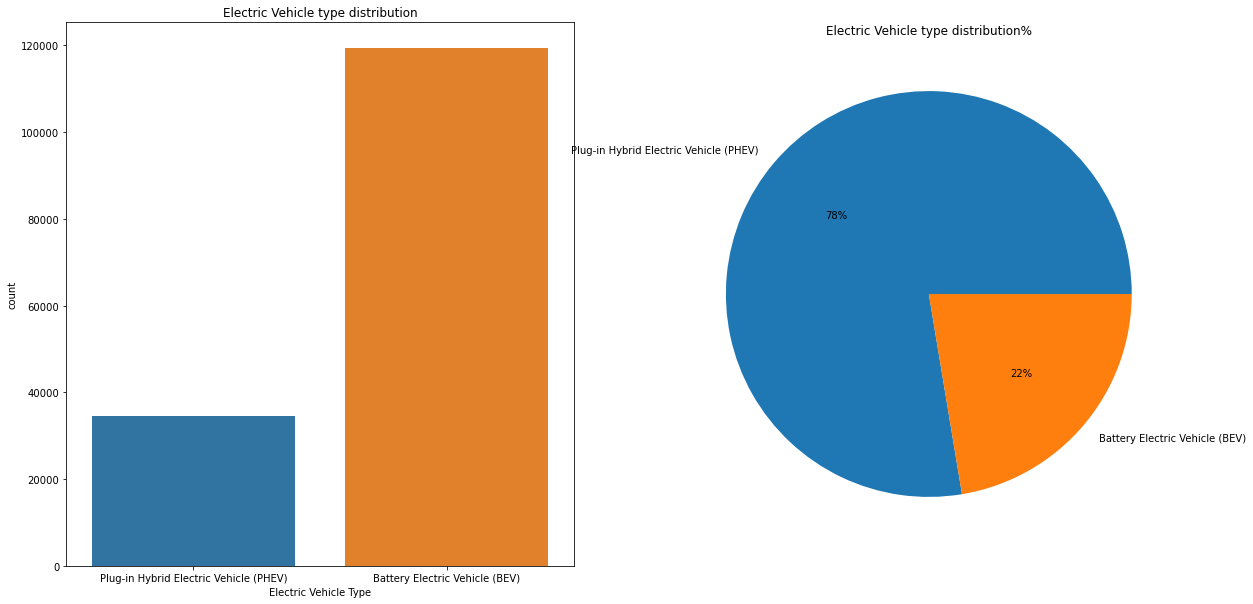

In [67]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title("Electric Vehicle type distribution")
sns.countplot(df['Electric Vehicle Type'],data=df)
plt.subplot(1,2,2)
plt.title("Electric Vehicle type distribution%")
plt.pie(df['Electric Vehicle Type'].value_counts(),labels=df['Electric Vehicle Type'].unique(),autopct="%0.0f%%")
;

In [54]:
df['Electric Vehicle Type'].value_counts()

Battery Electric Vehicle (BEV)            119396
Plug-in Hybrid Electric Vehicle (PHEV)     34434
Name: Electric Vehicle Type, dtype: int64

In [73]:
dist_year=df.groupby(['Model Year','Electric Vehicle Type'])['VIN (1-10)'].count().unstack()
dist_year

Electric Vehicle Type,Battery Electric Vehicle (BEV),Plug-in Hybrid Electric Vehicle (PHEV)
Model Year,,
1997,1.0,NaN
1998,1.0,NaN
1999,3.0,NaN
2000,8.0,NaN
2002,2.0,NaN
2003,1.0,NaN
2008,20.0,NaN
2010,21.0,3.0
2011,710.0,79.0


Text(0, 0.5, 'Count')

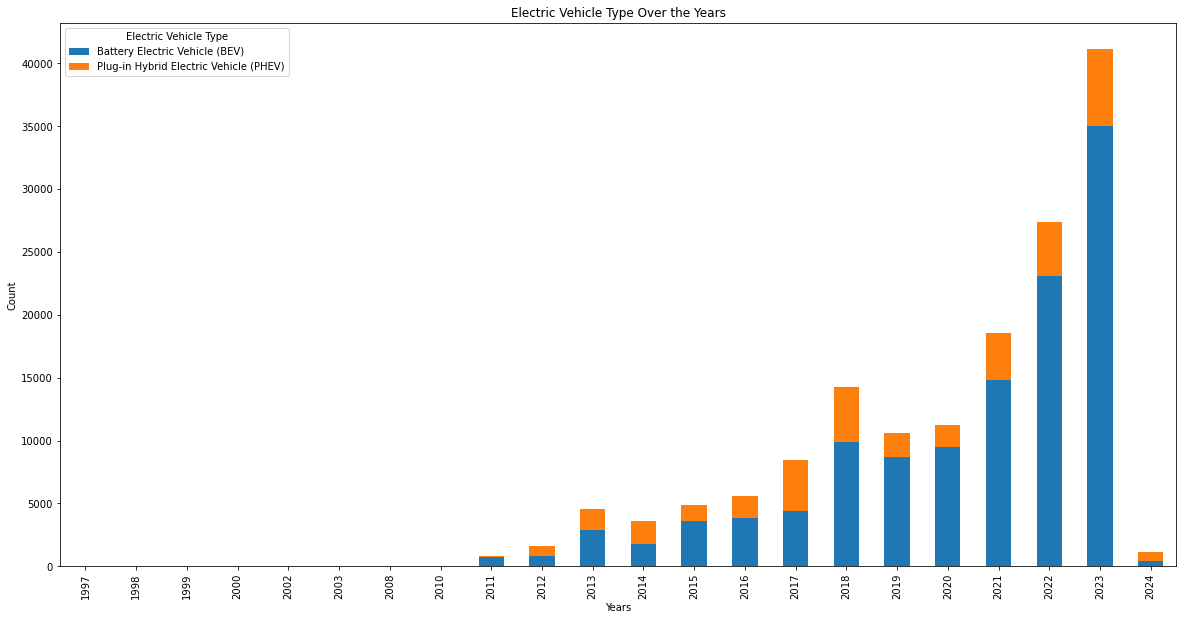

In [78]:
dist_year=df.groupby(['Model Year','Electric Vehicle Type'])['VIN (1-10)'].count().unstack()
dist_year.plot(kind="bar",stacked=True,figsize=(20,10))
plt.title("Electric Vehicle Type Over the Years");
plt.xlabel("Years")
plt.ylabel("Count")

# country vs electric vehicle type

In [85]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Counties,Congressional Districts,WAOFM - GIS - Legislative District Boundary
0,5UXTA6C05P,Yakima,Yakima,WA,98903.000000,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,14.000000,227153587,POINT (-120.477805 46.553505),PACIFICORP,5.307700e+10,2746.00000,4.000000,22.000000
1,5YJRE11B48,King,Seattle,BC,98171.496226,2008,TESLA,ROADSTER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,98950,29.302558,143609049,POINT (-122.12302 47.67668),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.297335e+10,2948.17781,5.696763,27.191997
2,5YJSA1E24G,King,Seattle,WA,98103.000000,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,43.000000,187728201,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10,3009.00000,7.000000,4.000000
3,1N4AZ1CP5J,King,Shoreline,WA,98177.000000,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0,32.000000,249867971,POINT (-122.382425 47.77279),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303302e+10,3009.00000,7.000000,21.000000
4,5YJ3E1EA6J,Island,Coupeville,WA,98239.000000,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,10.000000,223792649,POINT (-122.6880708 48.2179983),PUGET SOUND ENERGY INC,5.302997e+10,3007.00000,2.000000,16.000000


# State that have more concentration on EV

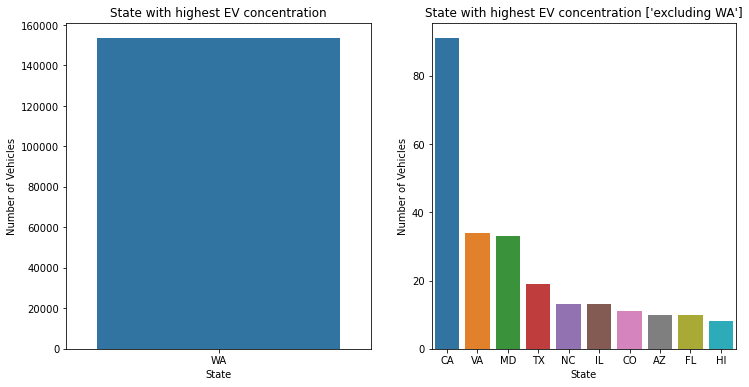

In [128]:
ev=df['State'].value_counts().reset_index() 
ev.columns = ['State', 'Count']
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("State with highest EV concentration")
ax=sns.barplot(data=ev[ev['State'] =='WA'],x='State',y='Count')
plt.xlabel('State')
plt.ylabel('Number of Vehicles')

top_5= ev[(ev['State']!="WA")].nlargest(10,'Count')
plt.subplot(1,2,2)
sns.barplot(data=top_5, x="State",y='Count')
plt.title("State with highest EV concentration ['excluding WA']")
plt.xlabel('State')
plt.ylabel('Number of Vehicles');

# Top 10 country that have more concentration on EV

<AxesSubplot:title={'center':'Country with highest EV concentration'}, xlabel='Country', ylabel='Count'>

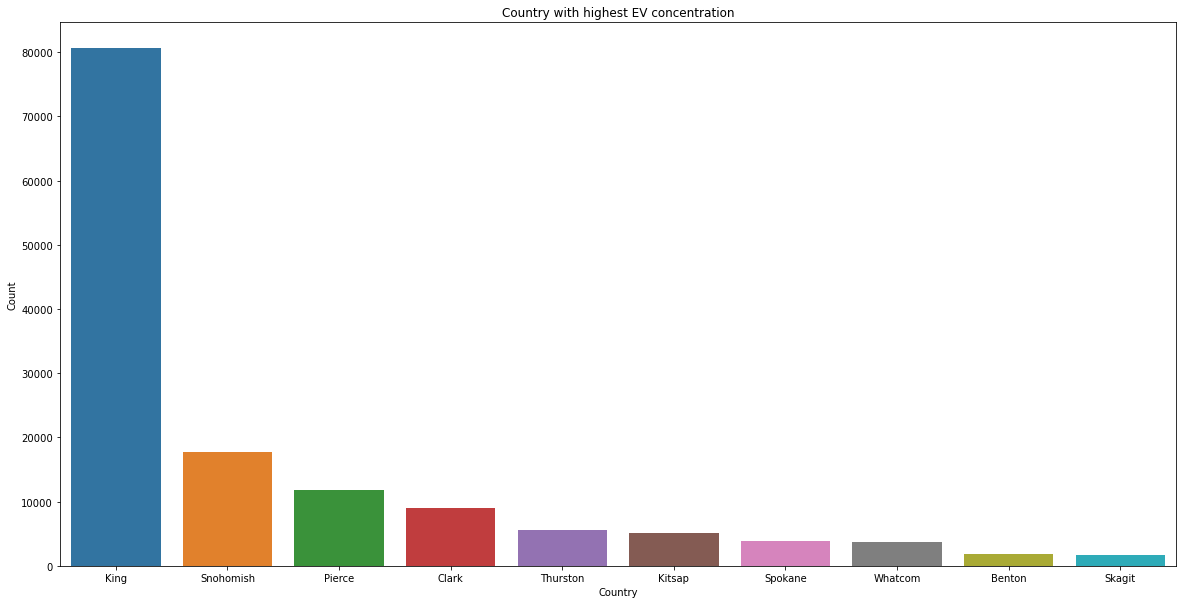

In [135]:
plt.figure(figsize=(20,10))
ev=df['County'].value_counts().reset_index()
ev.columns=['Country','Count']
ev=ev.nlargest(10,"Count")
plt.title("Country with highest EV concentration")
plt.xlabel('Country')
plt.ylabel('Number of Vehicles');
sns.barplot(data=ev, x='Country',y='Count')

# Top 10 city that have more concentration on EV

<AxesSubplot:title={'center':'City with highest EV concentration'}, xlabel='City', ylabel='Count'>

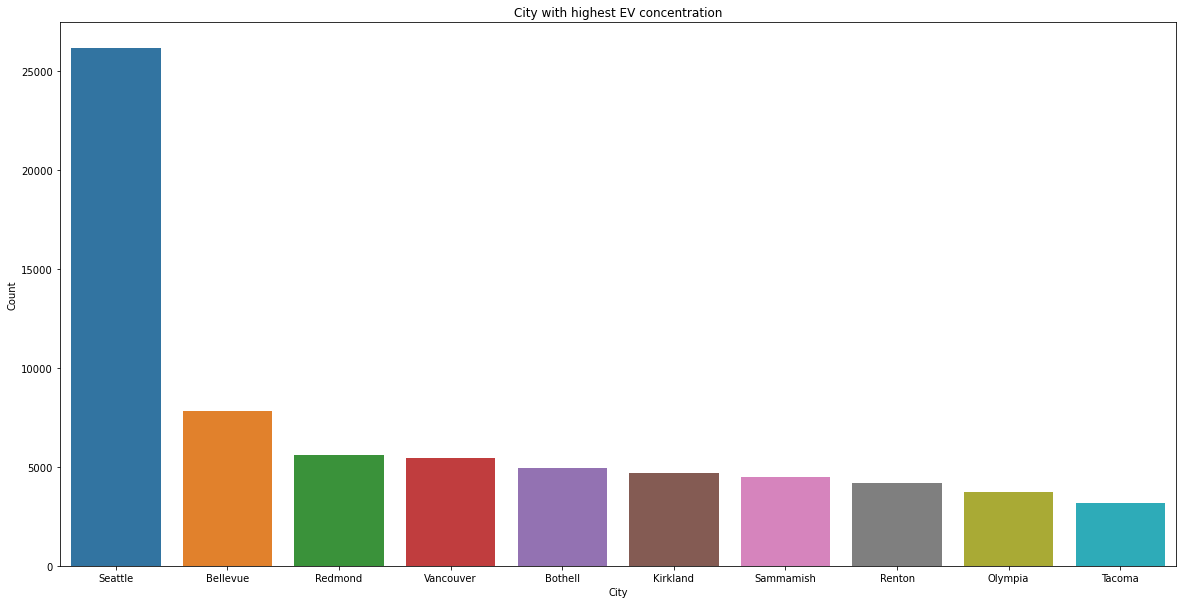

In [140]:
plt.figure(figsize=(20,10))
ev=df['City'].value_counts().reset_index()
ev.columns=['City','Count']
plt.title("City with highest EV concentration")
plt.xlabel('City')
plt.ylabel('Number of Vehicles');
ev=ev.nlargest(10,"Count")
sns.barplot(data=ev, x="City",y='Count')

# Electric Range VS Base MSRP

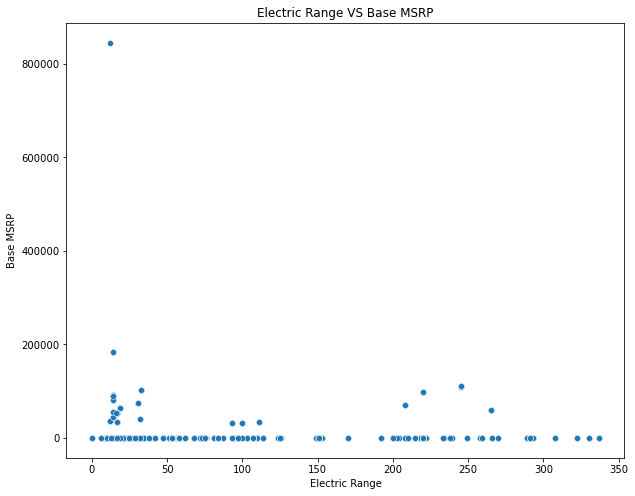

In [144]:
plt.figure(figsize=(10,8))
plt.title("Electric Range VS Base MSRP")
plt.xlabel('Electric Range')
plt.ylabel('Base MSRP');
sns.scatterplot(x='Electric Range',y='Base MSRP',data=df);

# Top 5 CAR MAKER 

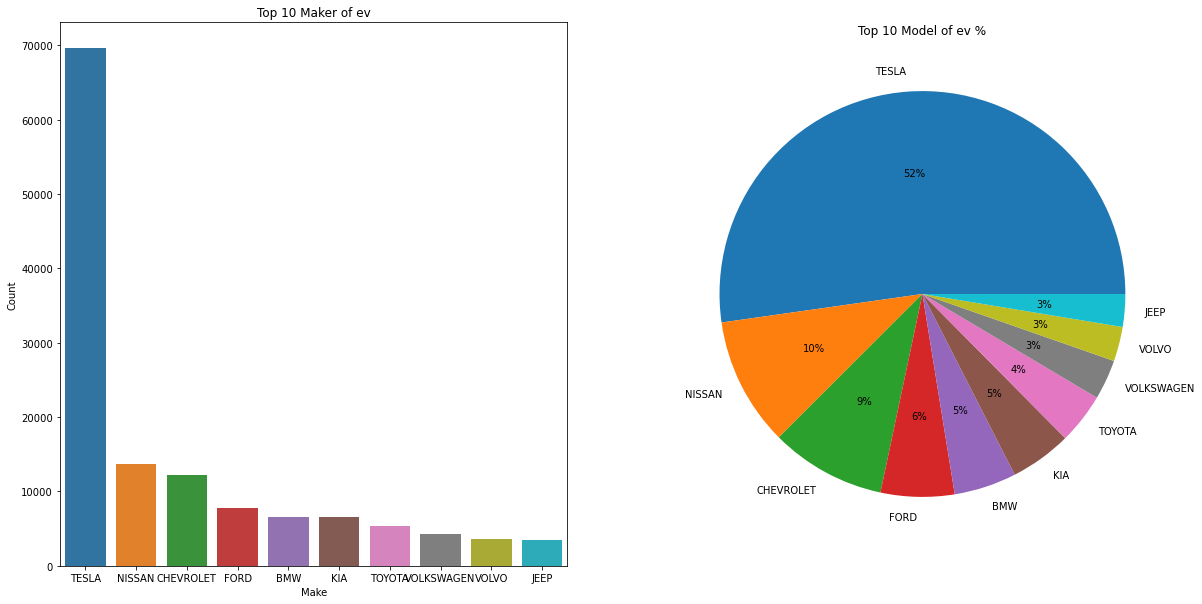

In [156]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
ev=df['Make'].value_counts().reset_index()
ev.columns=['Make','Count']
plt.title("Top 10 Maker of ev")
plt.xlabel('Make')
plt.ylabel('Number of Vehicles');
ev=ev.nlargest(10,"Count")
sns.barplot(data=ev, x="Make",y='Count');


plt.subplot(1,2,2)
plt.title("Top 10 Model of ev %")
ev=ev.nlargest(10,"Count")
plt.pie(ev.Count, labels=ev.Make.unique(), autopct="%0.0f%%");

In [148]:
ev

,Make,Count
0,TESLA,69601
1,NISSAN,13649
2,CHEVROLET,12242
3,FORD,7817
4,BMW,6620
5,KIA,6534
6,TOYOTA,5386
7,VOLKSWAGEN,4238
8,VOLVO,3666
9,JEEP,3468


# Top 10 Car Models

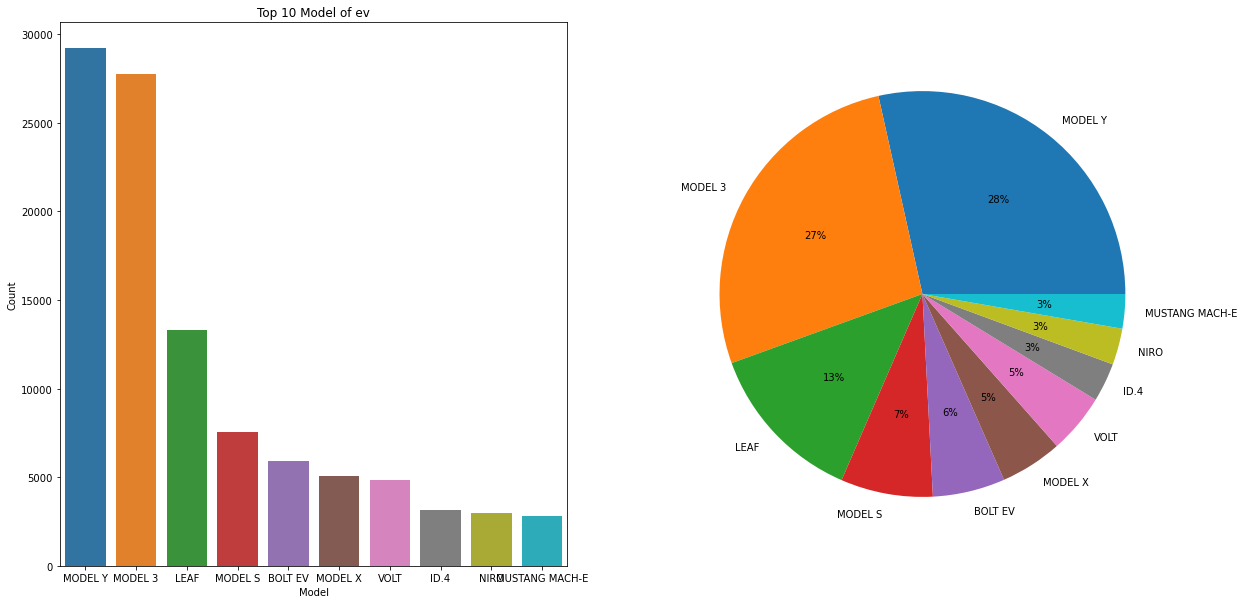

In [155]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
ev=df['Model'].value_counts().reset_index()
ev.columns=['Model','Count']
plt.title("Top 10 Model of ev")
plt.xlabel('Model')
plt.ylabel('Number of Vehicles');
ev=ev.nlargest(10,"Count")
sns.barplot(data=ev, x="Model",y='Count');


plt.subplot(1,2,2)
ev=ev.nlargest(10,"Count")
plt.title("Top 10 Model of ev %")
plt.pie(ev.Count, labels=ev.Model.unique(), autopct="%0.0f%%");